# Üst üste bindirme (overlay) analizi

In [1]:
# iki ayrı veri setini üst üste bindirerek görselleştirmeye çalışacağız
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# geopandas içerisindeki mevcut datasetlerini görelim ve görselleştirelim .

gpd.datasets.available

# ['naturalearth_cities', 'naturalearth_lowres', 'nybb'] --> [0] ülkelerin başkentleri verisi
                                                            #[1] düşük çözünürlüklü ülkeler haritası
                                                            #[2] new cities bb...

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [3]:
# 'naturalearth_lowres' dünya ülkelerini içermektedir.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 'naturalearth_cities' dünya başkentlerini içermektedir.
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

capitals.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


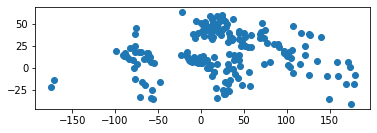

In [4]:
capitals.plot()

In [5]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


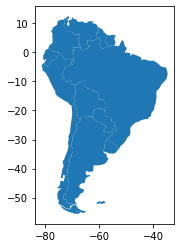

In [6]:
guney_amerika= world[world['continent']== 'South America'] # geopandasda filtreleme işlemi
guney_amerika=guney_amerika[['geometry','name']]

guney_amerika.plot()

In [7]:
guney_amerika.head()
guney_amerika.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
# hem başkentleri hem de güney amerika veri setini , metre cinsinden ölçülen bir projectiona çevirelim.
guney_amerika= guney_amerika.to_crs('epsg:3395')
capitals=capitals.to_crs('epsg:3395')

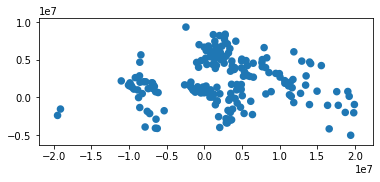

In [9]:
# Başkentlerin üzerine 500 km tamponlar oluşturalım
capitals['geometry']=capitals.buffer(500000)     
capitals.plot()

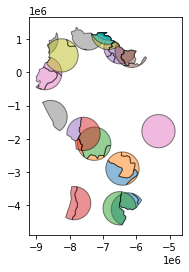

In [10]:
# Bu başkent tamponlarını, güney amerika veri seti ile üst üste bindirelim.
# Bindirme işlemini kümelerin kesişim yöntemiyle sağlayalım ( how = intersection)
# bindirilen her bir noktaya ayrı bir renk skalası uygulayalım (cmap)

guney_amerika_cores= gpd.overlay(guney_amerika,capitals,how='intersection')
# alpha parametresi şeffaflığı temsil ediyor. Kesişim kümesinden elde edilen verilerin kenar renkleri(edgecolor),
guney_amerika_cores.plot(alpha=0.5 , edgecolor= 'k', cmap= 'tab10')

# güney amerikadaki başkentlerin bufferları;

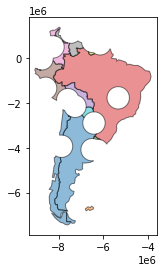

In [11]:
# bu kümemizin haricindeki yeri (how = 'difference' ) ile buluruz.
guney_amerika_peripheries= gpd.overlay(guney_amerika,capitals,how='difference')

guney_amerika_peripheries.plot(alpha=0.5 , edgecolor= 'k', cmap= 'tab10')